In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
import mnist # 같은 디렉토리 내에 있는 파일들 불러오는 코드
from tensorflow.keras.utils import to_categorical # 원 핫 인코딩 하는 함수

In [3]:
# 학습용과 테스트용 데이터 나눠서 받아옴
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 28*28 사이즈의 이미지 6만개
print(x_train.shape)

ValueError: cannot reshape array of size 9912406 into shape (28,28)

In [4]:
# 0~255 사이의 값을 0~1 사이의 값으로 Normalization
def convertData(x):
    x = np.array(x/255.0, dtype=np.float32)
    return x

In [5]:
# Normalization
x_train = convertData(x_train)
x_test = convertData(x_test)

# 원 핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

In [7]:
model = Sequential([
    # 28*28 사이즈의 흑백 이미지
    # size, size, 흑백=1 컬러=3
    Input(shape=(28,28,1)),
    
    # 입력 데이터를 1차원으로 변형
    Flatten(),
    # 활성화 함수로 relu 사용
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    
    # 10개 중의 하나의 답을 찾는 것이므로
    # 마지막 레이어의 활성화 함수는 softmax 사용
    Dense(10, activation='softmax')

])

In [8]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
# 다시 실행해도 같은 값 나오도록 시드값 고정
np.random.seed(2020)
tf.random.set_seed(2020)

# patience동안 val_loss의 값이 변화가 없으면 학습률을 factor만큼 줄임
# val_loss가 더 이상 작아지지 않으면 학습률을 줄여서 과적합 방지
learning_rate_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience= 3, mode='min', verbose=1)

# patience 동안 val_loss의 값이 변화가 없으면 학습 중단
earlystop_cb = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

# optimizer로 Adam사용
# 원 핫 인코딩을 했으므로 categorical crossentropy 사용
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 검증 데이터를 훈련 데이터에서 0.2만큼 추출하여 사용
# callback 함수로 학습률 조정 함수와, 미리 멈추는 함수 사용
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=50, shuffle=True, validation_split=0.2, callbacks=[learning_rate_cb, earlystop_cb])

Epoch 1/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3122 - accuracy: 0.9100 - val_loss: 0.1640 - val_accuracy: 0.9543
Epoch 2/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1322 - accuracy: 0.9609 - val_loss: 0.1269 - val_accuracy: 0.9622
Epoch 3/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0946 - accuracy: 0.9716 - val_loss: 0.0997 - val_accuracy: 0.9695
Epoch 4/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0707 - accuracy: 0.9780 - val_loss: 0.1032 - val_accuracy: 0.9697
Epoch 5/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0567 - accuracy: 0.9819 - val_loss: 0.1061 - val_accuracy: 0.9685
Epoch 6/50
1452/1500 [============================>.] - ETA: 0s - loss: 0.0431 - accuracy: 0.9856
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0435 - accuracy: 0.9854 - val_loss

313/313 [==============================] - 0s 866us/step - loss: 0.0770 - accuracy: 0.9798
Test loss :  0.07701416313648224
Test accuracy :  0.9797999858856201


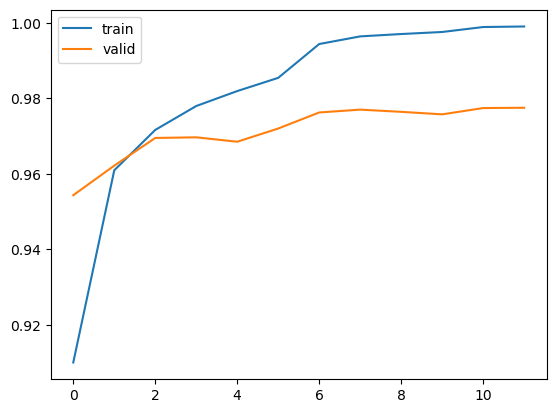

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# 검증 데이터와 학습 데이터의 학습 과정 그래프
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()

# 성능 평가 테스트
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test loss : ', test_loss)
print('Test accuracy : ', test_acc)